In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 2. Load the Dataset
df = pd.read_csv('Titanic-Dataset.csv')  # Replace with actual path if needed
print("Data Shape:", df.shape)
df.head()

Data Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 3. Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

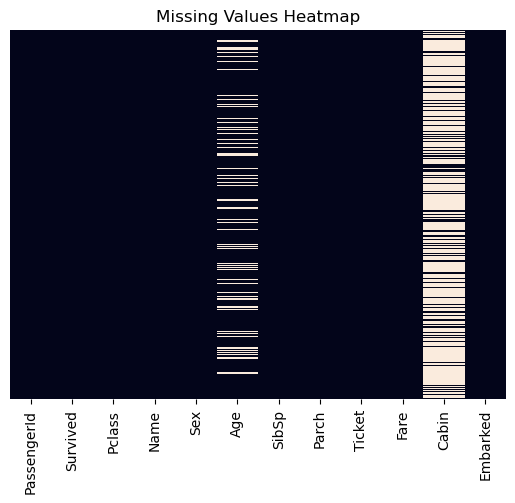

In [6]:
# Check missing values
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

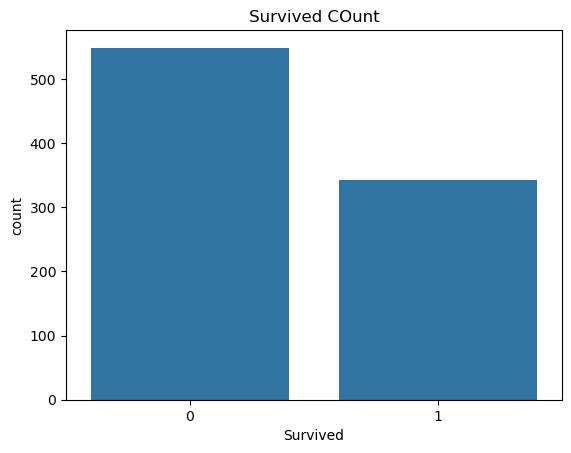

In [7]:
# Survived count

sns.countplot(x='Survived', data=df)
plt.title('Survived COunt')
plt.show()

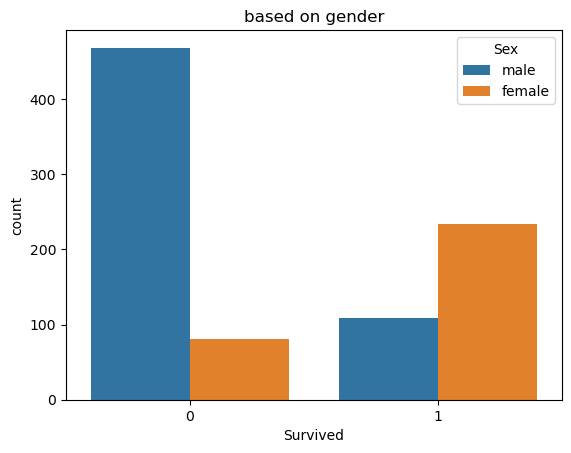

In [8]:
sns.countplot(x="Survived", hue ='Sex', data =df)
plt.title('based on gender')
plt.show()

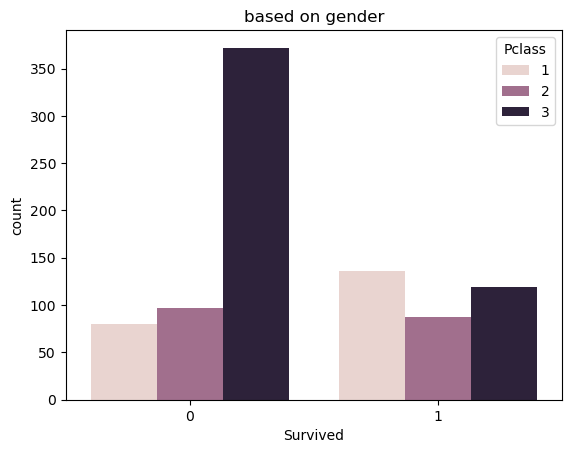

In [9]:
sns.countplot(x="Survived", hue ='Pclass', data =df)
plt.title('based on gender')
plt.show()

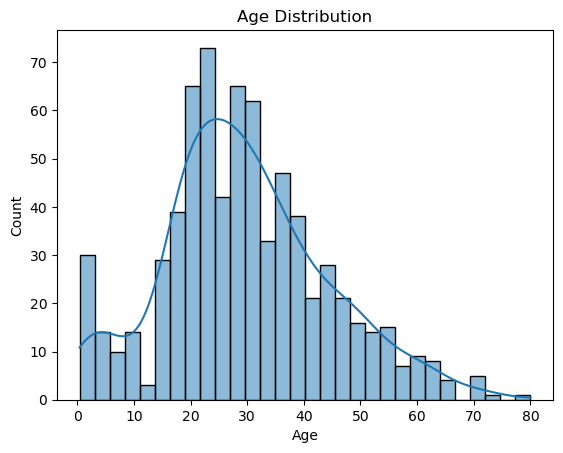

In [13]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

In [14]:
df['Embarked'].mode()[0]

'S'

<Axes: xlabel='Survived', ylabel='count'>

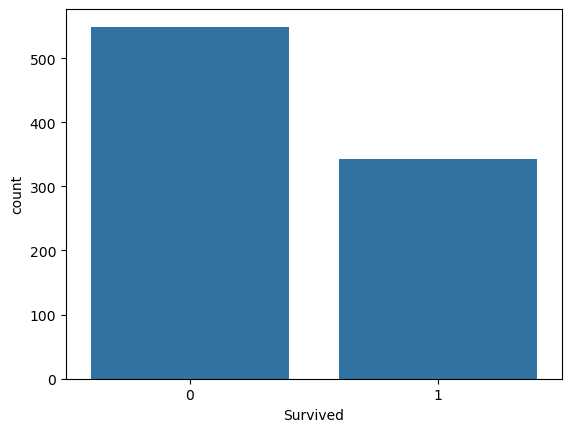

In [16]:
sns.countplot(x="Survived", data=df)


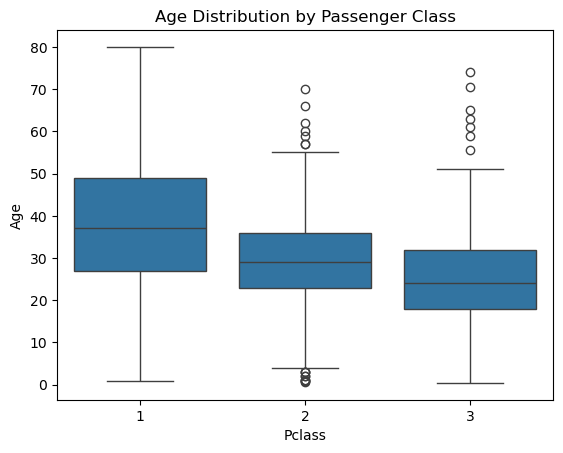

In [22]:
# Age distribution by Pclass
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age Distribution by Passenger Class")
plt.show()


In [48]:
df[df['Age'].isnull()& df['Pclass']==3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [54]:
for pclass in [1, 2, 3]:
    median_age = df[df['Pclass'] == pclass]['Age'].median()
    print(f"Pclass {pclass}: median age = {median_age}")


Pclass 1: median age = 37.0
Pclass 2: median age = 29.0
Pclass 3: median age = 24.0


In [60]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
df['Age'].isnull().sum()
df[df['Age'].isnull()].groupby('Pclass')['Age'].count()


Pclass
1    0
2    0
3    0
Name: Age, dtype: int64

In [66]:
df[df['Age'].isnull()].groupby('Pclass').size()


Pclass
1     30
2     11
3    136
dtype: int64

In [68]:
# Fill missing Age with median by Pclass
for pclass in [1, 2, 3]:
    median_age = df[df['Pclass'] == pclass]['Age'].median()
    df.loc[(df['Age'].isnull()) & (df['Pclass'] == pclass), 'Age'] = median_age

In [80]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\prajualr\AppData\Local\Temp\ipykernel_4496\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [82]:
df['Embarked'].isnull().sum()

0

In [84]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [86]:
df.drop('Cabin', axis=1, inplace=True)

In [92]:

# Drop Ticket and Name (for simplicity or high cardinality)
df.drop(['Ticket', 'Name'], axis=1, inplace=True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [96]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

In [98]:
df['Sex'] = le.fit_transform(df['Sex'])

In [100]:
df['Embarked'] = le.fit_transform(df['Embarked'])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [110]:
sc = StandardScaler()

In [112]:
X = df.drop(['PassengerId', 'Survived'], axis=1)
y = df['Survived']

In [114]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,24.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [116]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [158]:
X_train

,Pclass,Sex,Age,Fare
692,3,1,24.0,56.4958
481,2,1,29.0,0.0000
527,1,1,37.0,221.7792
855,3,0,18.0,9.3500
801,2,0,31.0,26.2500
...,...,...,...,...
359,3,0,24.0,7.8792
258,1,0,35.0,512.3292
736,3,0,48.0,34.3750
462,1,1,47.0,38.5000


In [124]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [126]:
y_pred = rf.predict(X_test)

In [130]:
y_train_pred = rf.predict(X_train)

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [132]:
accuracy_score(y_train, y_train_pred)

0.9831460674157303

In [134]:
accuracy_score(y_test, y_pred)

0.8212290502793296

In [138]:
print(confusion_matrix(y_test, y_pred))

[[96 14]
 [18 51]]


In [142]:
rf.feature_importances_

array([0.0904916 , 0.26052521, 0.25055027, 0.04775118, 0.04067377,
       0.27342236, 0.03658562])

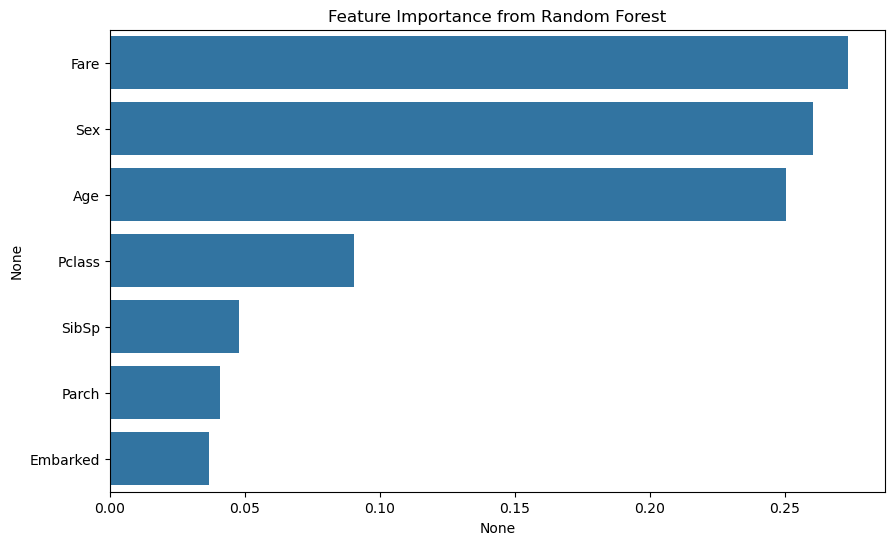

In [140]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance from Random Forest")
plt.show()

In [144]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,24.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [146]:
X = df.drop(columns=['SibSp','PassengerId','Parch','Embarked','Survived'])

In [148]:
X

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,24.0,23.4500
889,1,1,26.0,30.0000


In [150]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [168]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [154]:
X_train.shape

(712, 4)

In [170]:
rf1=RandomForestClassifier().fit(X_train_scaled,y_train)

In [174]:
y_pred_1 = rf1.predict(X_test_scaled)

In [176]:
print(confusion_matrix(y_test, y_pred_1))

[[97 13]
 [18 51]]


In [178]:
rf1.feature_importances_

array([0.0948113 , 0.28335515, 0.28401126, 0.33782229])

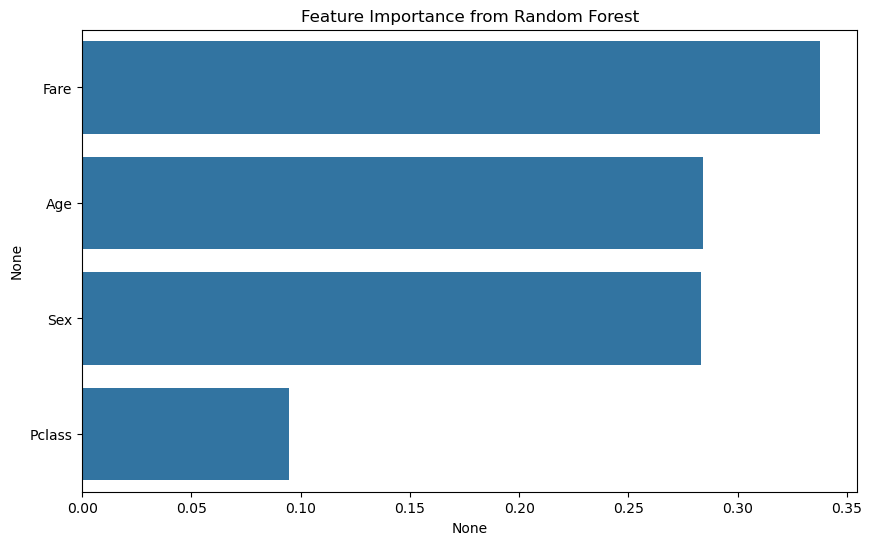

In [182]:
feature_imp = pd.Series(rf1.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance from Random Forest")
plt.show()